In [1]:
import nltk
import urllib.request
import math
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Read Text File

In [2]:
Text = open('PeterPan-chapter1.txt',errors='ignore').read()

print(Text)


I am by birth a Genevese, and my family is one of the most
distinguished of that republic.  My ancestors had been for many years
counsellors and syndics, and my father had filled several public
situations with honour and reputation.  He was respected by all who
knew him for his integrity and indefatigable attention to public
business.  He passed his younger days perpetually occupied by the
affairs of his country; a variety of circumstances had prevented his
marrying early, nor was it until the decline of life that he became a
husband and the father of a family.

As the circumstances of his marriage illustrate his character, I cannot
refrain from relating them.  One of his most intimate friends was a
merchant who, from a flourishing state, fell, through numerous
mischances, into poverty.  This man, whose name was Beaufort, was of a
proud and unbending disposition and could not bear to live in poverty
and oblivion in the same country where he had formerly been
distinguished for his rank 

### Filter Out Punctuation

In [3]:
text=''
for i in range(len(Text)):
    
    if Text[i]==',':
        text=text+''
    else:
        text=text+Text[i]
    
print(text)

I am by birth a Genevese and my family is one of the most
distinguished of that republic.  My ancestors had been for many years
counsellors and syndics and my father had filled several public
situations with honour and reputation.  He was respected by all who
knew him for his integrity and indefatigable attention to public
business.  He passed his younger days perpetually occupied by the
affairs of his country; a variety of circumstances had prevented his
marrying early nor was it until the decline of life that he became a
husband and the father of a family.

As the circumstances of his marriage illustrate his character I cannot
refrain from relating them.  One of his most intimate friends was a
merchant who from a flourishing state fell through numerous
mischances into poverty.  This man whose name was Beaufort was of a
proud and unbending disposition and could not bear to live in poverty
and oblivion in the same country where he had formerly been
distinguished for his rank and magnif

### Split Text into Sentences

In [4]:
sentence = text.split('.')
sentence = sentence[:-1]
print(sentence)

['I am by birth a Genevese and my family is one of the most\ndistinguished of that republic', '  My ancestors had been for many years\ncounsellors and syndics and my father had filled several public\nsituations with honour and reputation', '  He was respected by all who\nknew him for his integrity and indefatigable attention to public\nbusiness', '  He passed his younger days perpetually occupied by the\naffairs of his country; a variety of circumstances had prevented his\nmarrying early nor was it until the decline of life that he became a\nhusband and the father of a family', '\n\nAs the circumstances of his marriage illustrate his character I cannot\nrefrain from relating them', '  One of his most intimate friends was a\nmerchant who from a flourishing state fell through numerous\nmischances into poverty', '  This man whose name was Beaufort was of a\nproud and unbending disposition and could not bear to live in poverty\nand oblivion in the same country where he had formerly been\nd

In [5]:
print(len(sentence))

75


### Tokenization

In [6]:
arraytokens=[]
for i in sentence:

    tokens = i.split()
    tokens=[token.lower() for token in tokens if token.isalpha()]
    arraytokens.append(tokens)
    #print(tokens)
print(arraytokens)

[['i', 'am', 'by', 'birth', 'a', 'genevese', 'and', 'my', 'family', 'is', 'one', 'of', 'the', 'most', 'distinguished', 'of', 'that', 'republic'], ['my', 'ancestors', 'had', 'been', 'for', 'many', 'years', 'counsellors', 'and', 'syndics', 'and', 'my', 'father', 'had', 'filled', 'several', 'public', 'situations', 'with', 'honour', 'and', 'reputation'], ['he', 'was', 'respected', 'by', 'all', 'who', 'knew', 'him', 'for', 'his', 'integrity', 'and', 'indefatigable', 'attention', 'to', 'public', 'business'], ['he', 'passed', 'his', 'younger', 'days', 'perpetually', 'occupied', 'by', 'the', 'affairs', 'of', 'his', 'a', 'variety', 'of', 'circumstances', 'had', 'prevented', 'his', 'marrying', 'early', 'nor', 'was', 'it', 'until', 'the', 'decline', 'of', 'life', 'that', 'he', 'became', 'a', 'husband', 'and', 'the', 'father', 'of', 'a', 'family'], ['as', 'the', 'circumstances', 'of', 'his', 'marriage', 'illustrate', 'his', 'character', 'i', 'cannot', 'refrain', 'from', 'relating', 'them'], ['one'

### Stopword List

In [7]:
sw = open("NLTK's list of english stopwords").read().split()
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

### Filter Out Stopwords

In [8]:
TokensAfterfilter=[]
x=[]
for Sentence in arraytokens:
    ctokens = Sentence
    for token in Sentence:
        if token in sw:
            x.append(token)
    for i in range(len(x)):
        while(ctokens.count(x[i])):
            ctokens.remove(x[i])
            
                
    TokensAfterfilter.append(ctokens)
print(TokensAfterfilter)

[['birth', 'genevese', 'family', 'one', 'distinguished', 'republic'], ['ancestors', 'many', 'years', 'counsellors', 'syndics', 'father', 'filled', 'several', 'public', 'situations', 'honour', 'reputation'], ['respected', 'knew', 'integrity', 'indefatigable', 'attention', 'public', 'business'], ['passed', 'younger', 'days', 'perpetually', 'occupied', 'affairs', 'variety', 'circumstances', 'prevented', 'marrying', 'early', 'decline', 'life', 'became', 'husband', 'father', 'family'], ['circumstances', 'marriage', 'illustrate', 'character', 'cannot', 'refrain', 'relating'], ['one', 'intimate', 'friends', 'merchant', 'flourishing', 'state', 'fell', 'numerous', 'mischances', 'poverty'], ['man', 'whose', 'name', 'beaufort', 'proud', 'unbending', 'disposition', 'could', 'bear', 'live', 'poverty', 'oblivion', 'country', 'formerly', 'distinguished', 'rank', 'magnificence'], ['paid', 'debts', 'therefore', 'honourable', 'manner', 'retreated', 'daughter', 'town', 'lucerne', 'lived', 'unknown', 'wre

### Lemmatization

In [9]:
lemmatizer = WordNetLemmatizer()

for i in range(len(TokensAfterfilter)):
    for j in range(len(TokensAfterfilter[i])):
        TokensAfterfilter[i][j] = lemmatizer.lemmatize(TokensAfterfilter[i][j])
        
print(TokensAfterfilter)

[['birth', 'genevese', 'family', 'one', 'distinguished', 'republic'], ['ancestor', 'many', 'year', 'counsellor', 'syndic', 'father', 'filled', 'several', 'public', 'situation', 'honour', 'reputation'], ['respected', 'knew', 'integrity', 'indefatigable', 'attention', 'public', 'business'], ['passed', 'younger', 'day', 'perpetually', 'occupied', 'affair', 'variety', 'circumstance', 'prevented', 'marrying', 'early', 'decline', 'life', 'became', 'husband', 'father', 'family'], ['circumstance', 'marriage', 'illustrate', 'character', 'cannot', 'refrain', 'relating'], ['one', 'intimate', 'friend', 'merchant', 'flourishing', 'state', 'fell', 'numerous', 'mischance', 'poverty'], ['man', 'whose', 'name', 'beaufort', 'proud', 'unbending', 'disposition', 'could', 'bear', 'live', 'poverty', 'oblivion', 'country', 'formerly', 'distinguished', 'rank', 'magnificence'], ['paid', 'debt', 'therefore', 'honourable', 'manner', 'retreated', 'daughter', 'town', 'lucerne', 'lived', 'unknown', 'wretchedness'],

### Positive Words List & Negative Words List

In [10]:
pos = open('positive-words.txt').read().split()
print(pos)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [11]:
neg = open('negative-words.txt').read().split()
print(neg)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [12]:
print(len(sentence))

75


### Calculate Sentiment Score for Each Sentences

In [13]:
score = []

for i in range(len(TokensAfterfilter)):
   
    for j in range(len(TokensAfterfilter[i])):
        
        countpositive = countnegative = 0
        
        if TokensAfterfilter[i][j] in pos:
            
            countpositive = countpositive + 1
        elif TokensAfterfilter[i][j] in neg:
           
            countnegative = countnegative + 1
           
    s = countpositive - countnegative
    score.append(s)
    #print("sentence",i+1,sentence[i],":",s)
    #print(' ')

### Calculate Delta3 Score

In [14]:
Delta = []
scorearray = []

for i in range(len(score)):
    scorearray.append(score[i])
    
#print(len(score))

for i in range(3) :
    scorearray.insert(0,0)
    scorearray.append(0)

print(scorearray)

#print(len(score))
#print(len(scorearray))


[0, 0, 0, 0, 1, 0, 0, 0, -1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, -1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


In [15]:
for i in range(len(score)):
    delta = 0
    for j in range(7):
        delta +=  scorearray[i+j] 
        delta =  delta/7
        delta = round(delta,3)
    Delta.append(delta)
    
print(Delta)
#print(len(Delta))

[0.003, 0.0, -0.143, 0.122, -0.125, -0.018, -0.003, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.143, -0.122, -0.017, -0.002, -0.143, -0.02, -0.003, -0.0, 0.143, 0.02, 0.146, 0.021, 0.146, 0.021, 0.003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.143, 0.02, 0.003, 0.0, -0.143, -0.02, -0.003, -0.0, 0.0, 0.0, 0.0, 0.143, 0.02, 0.003, 0.0, 0.0, 0.0, 0.143, 0.02, 0.003, -0.142, -0.02, -0.146, -0.021, -0.003, -0.0, 0.0, -0.143, 0.122, 0.16, 0.023, 0.146, 0.021, 0.146, 0.021, 0.003, 0.0, 0.0, 0.0, 0.0]


### Show Table Result of Sentiment Analysis

In [16]:
import pandas as pd

data = []
for i in range(len(sentence)):
    
    data.append([sentence[i],score[i], Delta[i]])

Table = pd.DataFrame(data,columns=["Sentence","Score", "Delta3"])
Table

,Sentence,Score,Delta3
0,I am by birth a Genevese and my family is one ...,0,0.003
1,My ancestors had been for many years\ncounse...,1,0.000
2,He was respected by all who\nknew him for hi...,0,-0.143
3,He passed his younger days perpetually occup...,0,0.122
4,\n\nAs the circumstances of his marriage illus...,0,-0.125
...,...,...,...
70,On the evening previous to her being brought...,0,0.003
71,โ€ And when on the morrow she\npresented Eliz...,1,0.000
72,All praises bestowed on\nher I received as m...,0,0.000
73,We called each other\nfamiliarly by the name...,0,0.000


### Plot Linear Graph of Delta3 Value

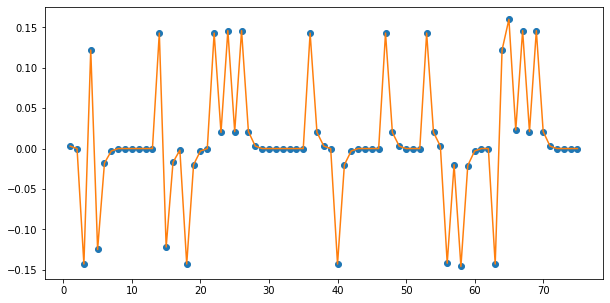

In [19]:
import matplotlib.pyplot as plt
x =  np.arange(1,len(Delta)+1)

plt.figure(figsize=(10,5))
plt.plot(x,Delta,'o')
plt.plot(x,Delta)
plt.show()